# Iris dataset project

This is the practice for data classification by analayzing the iris dataset

## 0. Packages and Data

In [1]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

#### Some useful functions

In [2]:
def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

### 0.1 Import dataset

In [3]:
origin=pd.read_csv('iris_data.csv',sep=',')

In [4]:
origin.head()

,﻿Sepal_length,Sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Get to know our dataset

In [5]:
origin.rename(columns={'\xef\xbb\xbfSepal_length':'Sepal_length'},inplace=True)

In [6]:
print_columns(origin)

There are 5 columns
They are:
Sepal_length
Sepal_width
petal_length
petal_width
class


In [7]:
list_null(origin)

5  columns:
Sepal_length : number of nan:  0 ,  float64
Sepal_width : number of nan:  0 ,  float64
petal_length : number of nan:  0 ,  float64
petal_width : number of nan:  0 ,  float64
class : number of nan:  0 ,  object


Descriptive statistics

In [8]:
origin.describe()

,Sepal_length,Sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


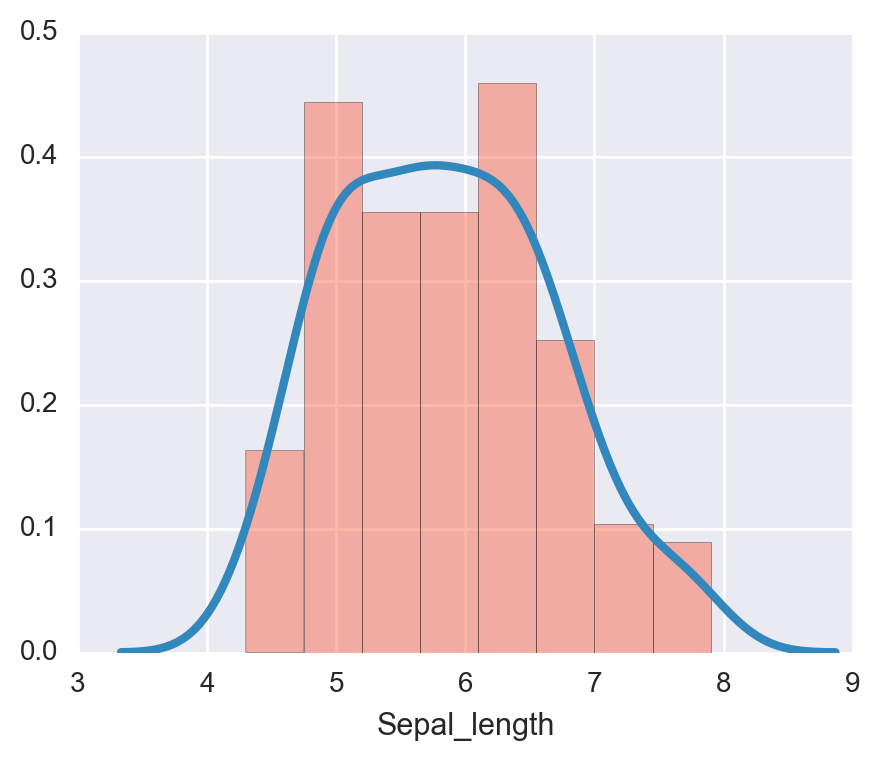

In [9]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
name=origin.columns.values[0]
kde_kws={"color": "#3288bd", "lw": 3}
sns.distplot(origin[name], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a',vertical=False, norm_hist=False, label=None, ax=None)

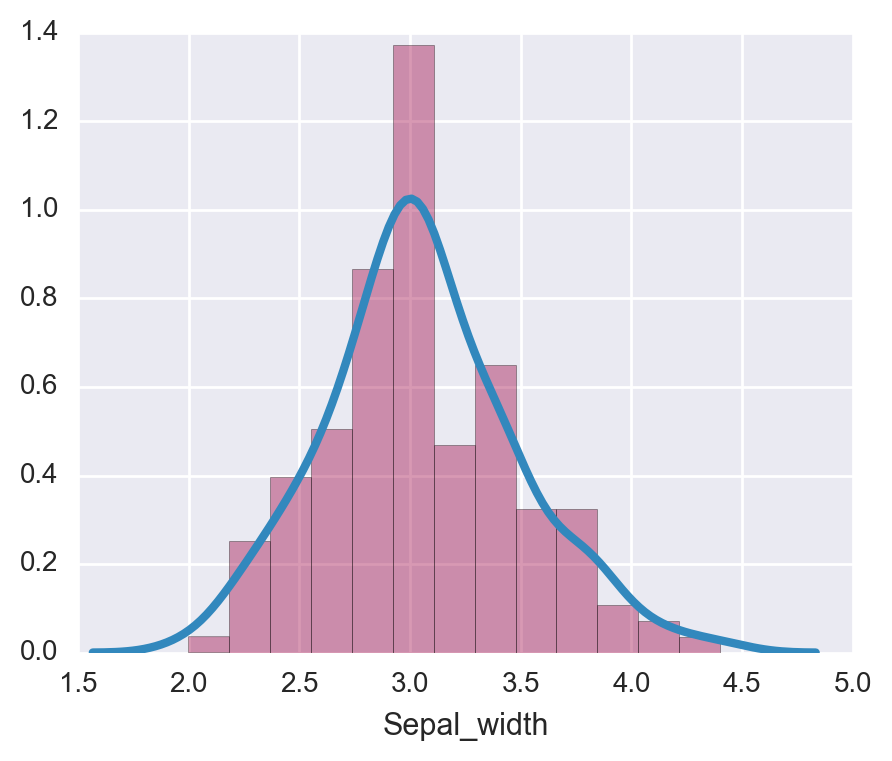

In [10]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
name=origin.columns.values[1]
kde_kws={"color": "#3288bd", "lw": 3}
sns.distplot(origin[name], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#9e0142',vertical=False, norm_hist=False, label=None, ax=None)

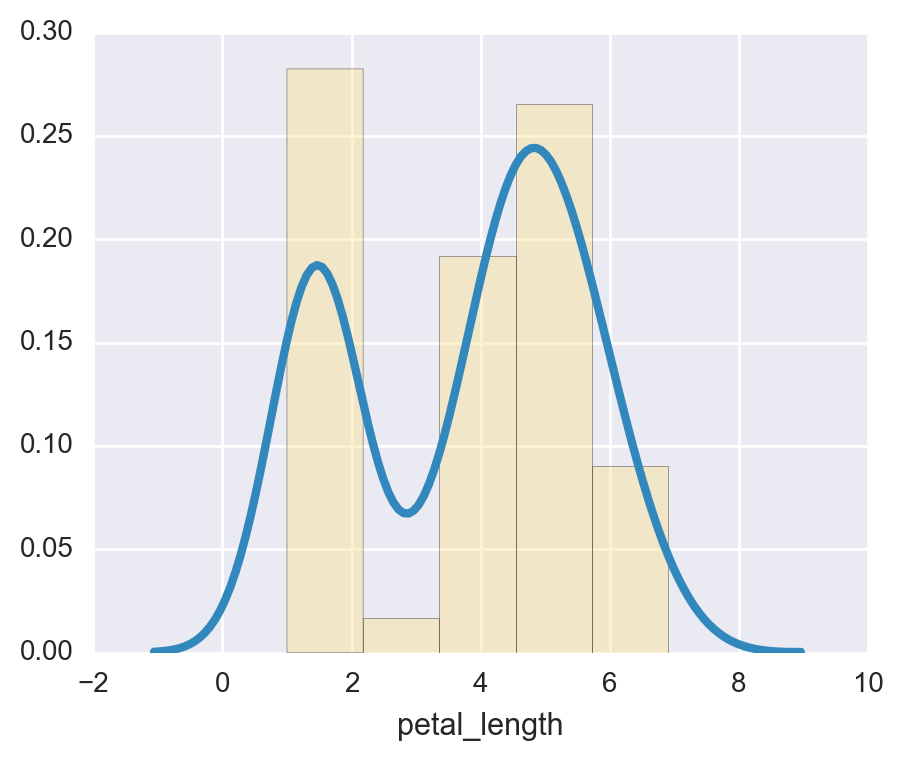

In [11]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
name=origin.columns.values[2]
kde_kws={"color": "#3288bd", "lw": 3}
sns.distplot(origin[name], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fee08b',vertical=False, norm_hist=False, label=None, ax=None)

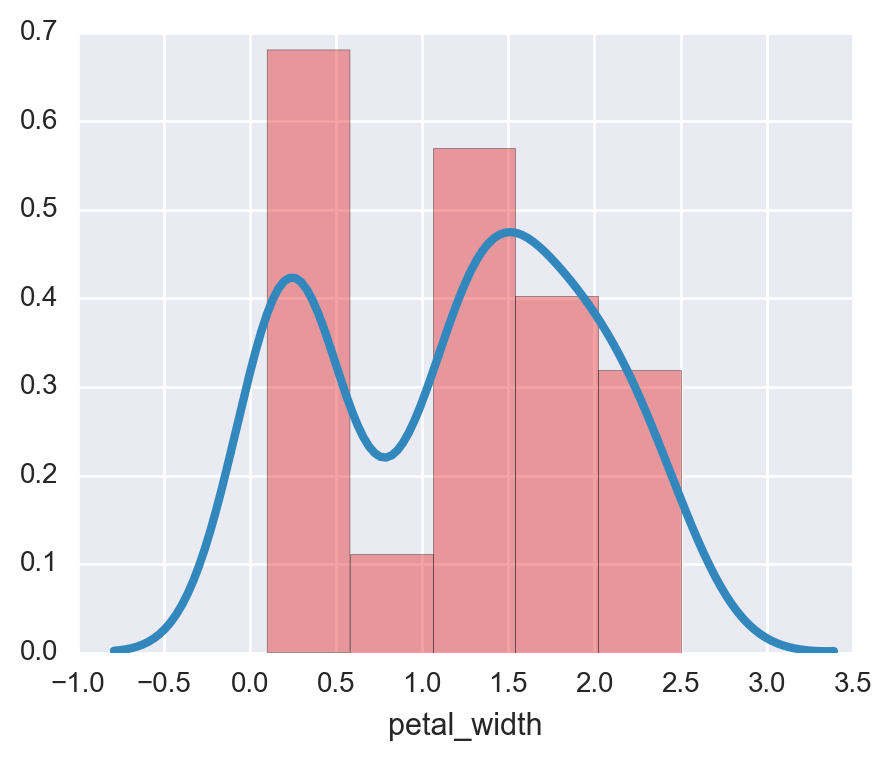

In [12]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
name=origin.columns.values[3]
kde_kws={"color": "#3288bd", "lw": 3}
sns.distplot(origin[name], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#e31a1c',vertical=False, norm_hist=False, label=None, ax=None)

Now Let's convert the Y to the numerical value

In [13]:
def pick(x):
    if x=='Iris-setosa':
        return int(0)
    elif x=='Iris-versicolor':
        return int(1)
    elif x=='Iris-virginica':
        return int(2)

In [14]:
origin['class']=origin['class'].apply(pick)

In [15]:
origin.head()

,Sepal_length,Sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now we are ready to do the data correlation analysis

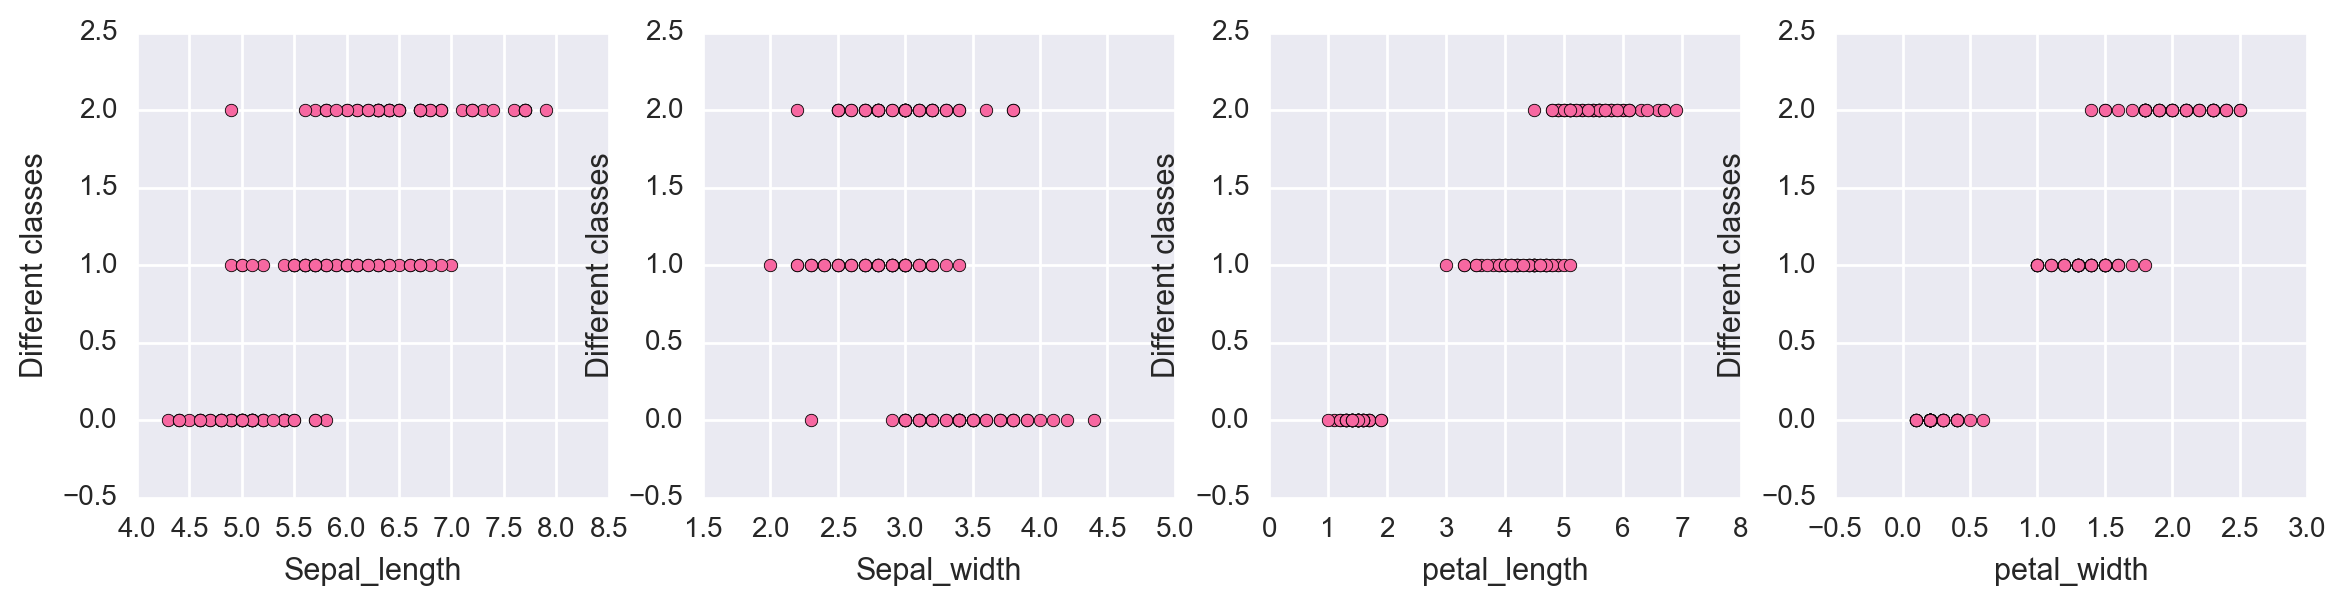

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(4):
    axes[i].scatter(origin[origin.columns.values[i]], origin['class'],c='#f768a1', marker="o")
    axes[i].set_xlabel(origin.columns.values[i])
    axes[i].set_ylabel("Different classes")

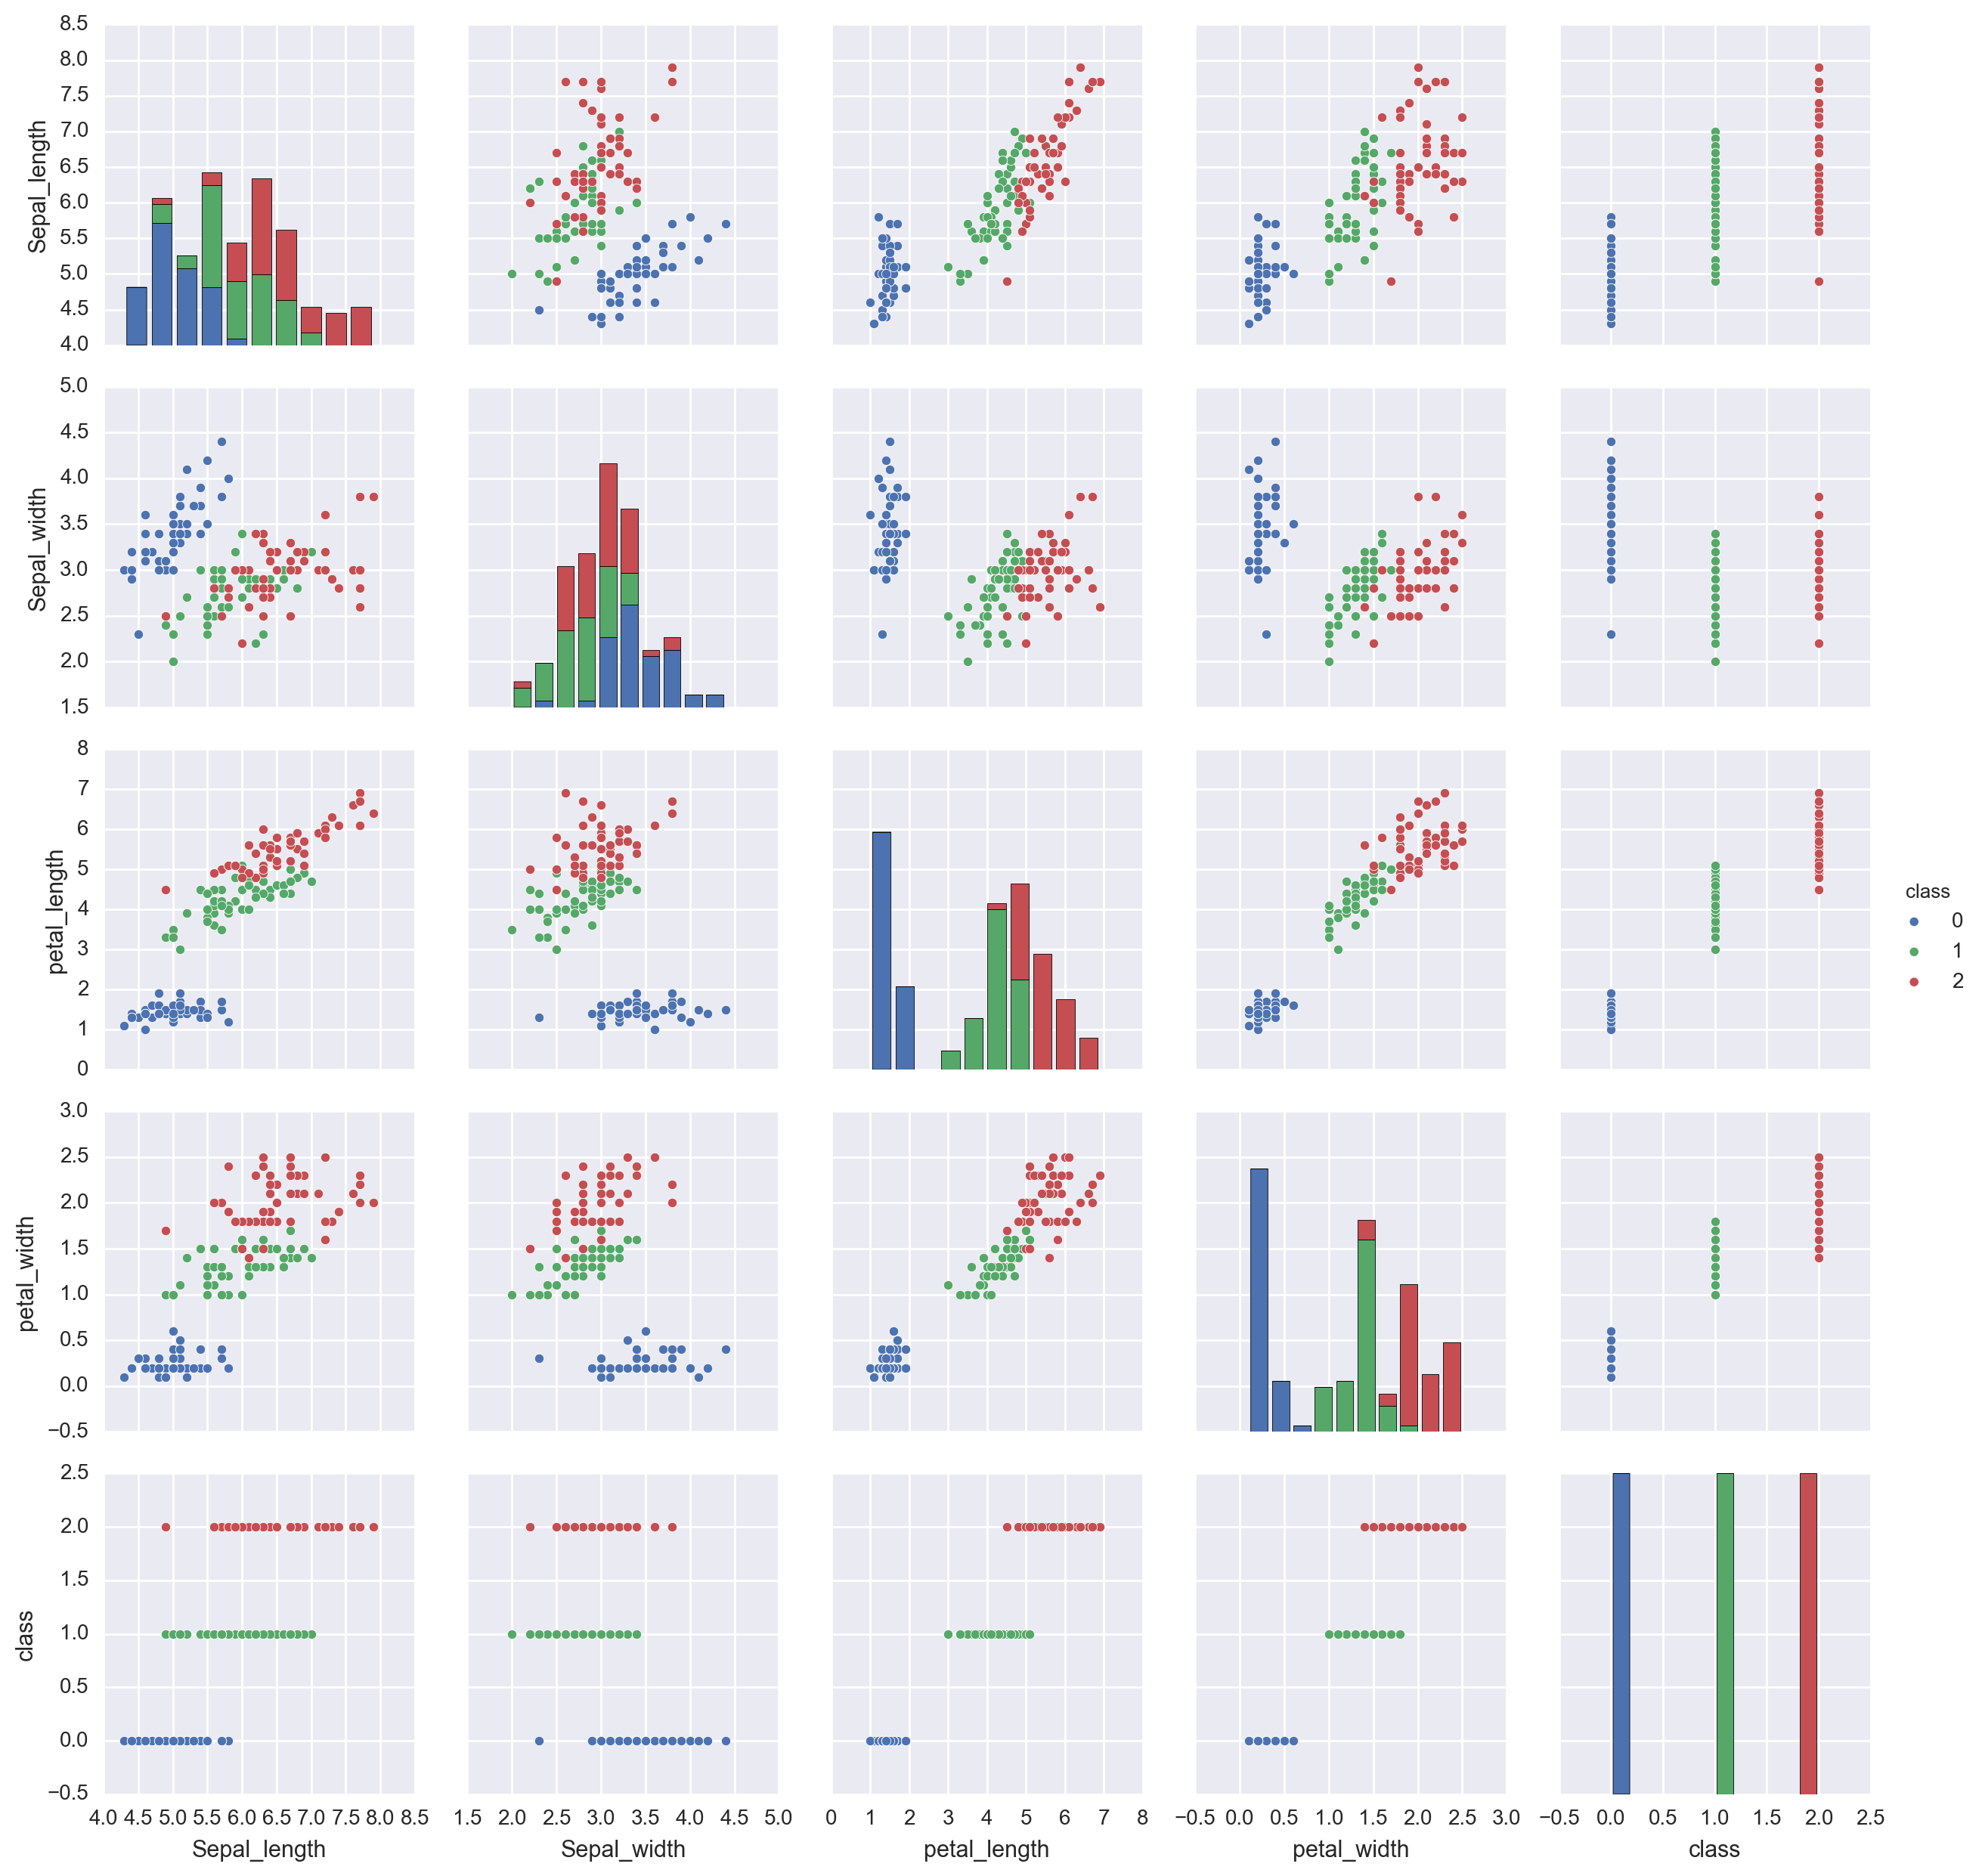

In [17]:
# fig, axes = plt.subplots(1, 1, figsize=(8,6))

sns.pairplot(origin,hue="class")

## 2. Evaluate model

In [18]:
X=pd.DataFrame()
Y=pd.DataFrame()

In [19]:
print_columns(origin)

There are 5 columns
They are:
Sepal_length
Sepal_width
petal_length
petal_width
class


In [20]:
X=origin[['Sepal_length','Sepal_width','petal_length','petal_width']]
Y=origin['class']

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=7)

In [56]:
# Test options and evaluation metric

num_folds=10
seed=7
scoring='accuracy'

In [57]:
# Spot-Check Algorithms

models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVC',SVC()))
models.append(('NB',GaussianNB()))

In [58]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

LR:0.944444 (0.055556)
KNN:0.966667 (0.050918)
CART:0.955556 (0.054433)
SVC:0.988889 (0.033333)
NB:0.977778 (0.044444)


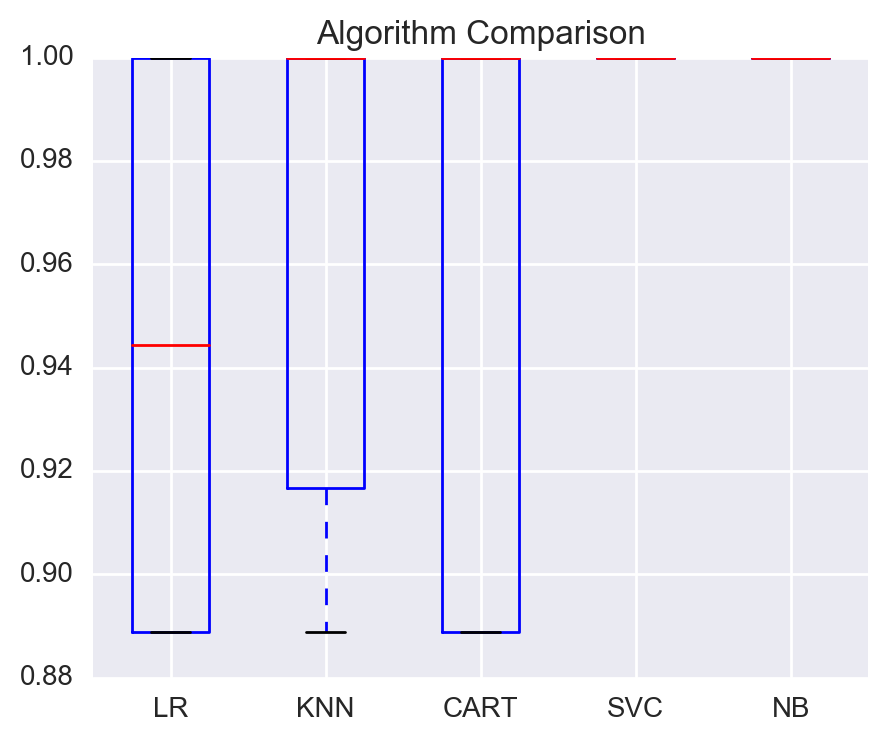

In [59]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)

There are two candidates for the mdoel: SVC and KNN. Let's standard scale the data:

### 2.1  Evaluate Algorithms: Standardization

In [60]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC',Pipeline([('Scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('ScaledNB',Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))

In [61]:
results=[]
names=[]
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledLR:0.877778 (0.104822)
ScaledKNN:0.944444 (0.055556)
ScaledCART:0.966667 (0.050918)
ScaledSVC:0.966667 (0.050918)
ScaledNB:0.977778 (0.044444)


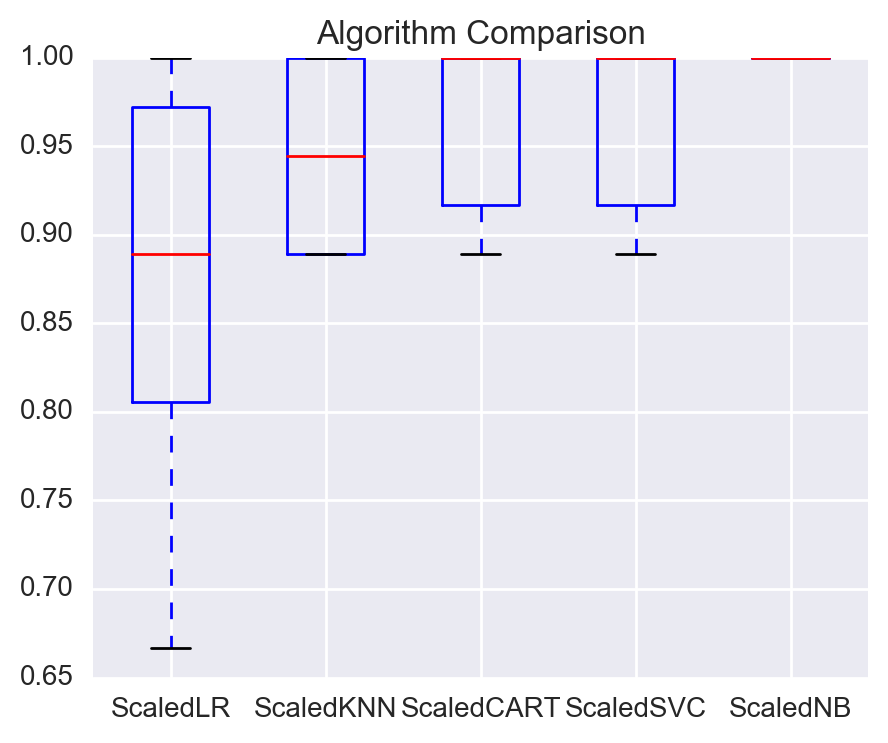

In [62]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)

### 2.2 Algorithm tunning
#### 2.2.1 KNN

In [63]:
k_values=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
model=KNeighborsClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold,verbose=1)
grid_result=grid.fit(X_train,Y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.6s finished


In [64]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: 0.988889 using {'n_neighbors': 9}
0.966667 (0.050918) with: {'n_neighbors': 1}
0.955556 (0.054433) with: {'n_neighbors': 3}
0.966667 (0.050918) with: {'n_neighbors': 5}
0.966667 (0.050918) with: {'n_neighbors': 7}
0.988889 (0.033333) with: {'n_neighbors': 9}
0.977778 (0.044444) with: {'n_neighbors': 11}
0.977778 (0.044444) with: {'n_neighbors': 13}
0.966667 (0.071146) with: {'n_neighbors': 15}
0.977778 (0.066667) with: {'n_neighbors': 17}
0.977778 (0.044444) with: {'n_neighbors': 19}
0.977778 (0.044444) with: {'n_neighbors': 21}


#### 2.2.2 Support Vector machine

### 2.3 Ensemble Methods

In [48]:
# Spot-Check Algorithms

ensembles=[]
ensembles.append(('AB',AdaBoostClassifier()))
ensembles.append(('GBM',GradientBoostingClassifier()))
ensembles.append(('RF',RandomForestClassifier()))
ensembles.append(('ET',ExtraTreesClassifier()))

In [49]:
result=[]
names=[]

for name,ensemble in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg='%s : %f (%f)' % (name,cv_results.mean(),cv_results.std())
    print msg

AB : 0.960000 (0.066332)
GBM : 0.960000 (0.066332)
RF : 0.960000 (0.066332)
ET : 0.960000 (0.066332)


Now let's try tuning the RandomForest classifier

In [50]:
estimators=np.array([1,10,50,100,200])
depth=np.array([1,5,10,20])
param_grid=dict(n_estimators=estimators,max_depth=depth)
model=RandomForestClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold,verbose=1)
grid_result=grid.fit(X_train,Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   52.0s finished


In [51]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: 0.980000 using {'n_estimators': 1, 'max_depth': 10}
0.650000 (0.050000) with: {'n_estimators': 1, 'max_depth': 1}
0.950000 (0.050000) with: {'n_estimators': 10, 'max_depth': 1}
0.960000 (0.066332) with: {'n_estimators': 50, 'max_depth': 1}
0.940000 (0.048990) with: {'n_estimators': 100, 'max_depth': 1}
0.970000 (0.045826) with: {'n_estimators': 200, 'max_depth': 1}
0.970000 (0.064031) with: {'n_estimators': 1, 'max_depth': 5}
0.960000 (0.048990) with: {'n_estimators': 10, 'max_depth': 5}
0.960000 (0.048990) with: {'n_estimators': 50, 'max_depth': 5}
0.960000 (0.048990) with: {'n_estimators': 100, 'max_depth': 5}
0.960000 (0.048990) with: {'n_estimators': 200, 'max_depth': 5}
0.980000 (0.040000) with: {'n_estimators': 1, 'max_depth': 10}
0.960000 (0.048990) with: {'n_estimators': 10, 'max_depth': 10}
0.960000 (0.048990) with: {'n_estimators': 50, 'max_depth': 10}
0.960000 (0.048990) with: {'n_estimators': 100, 'max_depth': 10}
0.960000 (0.048990) with: {'n_estimators': 200, 'max_d

### 2.4 Finalize Model

As our previous results show, we will use KNN method for the final prediction

In [65]:
# prepare the model
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [66]:
# transform the validation dataset

predictions=model.predict(X_test)
print accuracy_score(Y_test,predictions)

0.95


In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print confusion_matrix(Y_test,predictions)
print classification_report(Y_test,predictions)

[[19  0  0]
 [ 0 19  2]
 [ 0  1 19]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.95      0.90      0.93        21
          2       0.90      0.95      0.93        20

avg / total       0.95      0.95      0.95        60

